In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [18]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [19]:
init_notebook_mode(connected=True)
cf.go_offline()

In [20]:
df=pd.read_csv('PETCOKE.csv')

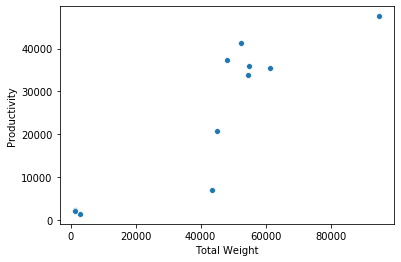

In [21]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [22]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,8.000000
mean,6747.909091,192695.000000,46.515455,62.215455,41862.779182,0.419091,0.041909,0.0,13.363636,0.125455,24049.621818,53217.500000
std,3582.101268,2792.818934,37.565487,57.198082,29162.352008,0.292590,0.029259,0.0,21.027635,0.416086,17795.219351,21500.770035
min,1097.000000,190953.000000,13.070000,15.870000,1250.000000,0.010000,0.001000,0.0,0.000000,0.000000,1350.840000,19282.000000
25%,4952.500000,191198.500000,30.775000,36.795000,23277.060000,0.235000,0.023500,0.0,0.375000,0.000000,4578.920000,46142.525000
50%,8846.000000,192142.000000,38.800000,45.350000,48067.000000,0.480000,0.048000,0.0,4.700000,0.000000,33828.870000,52022.250000
75%,8869.000000,192802.000000,50.085000,65.960000,54844.994500,0.550000,0.055000,0.0,14.875000,0.000000,36624.770000,56721.500000
max,8949.000000,200788.000000,152.330000,224.870000,94961.720000,0.950000,0.095000,0.0,65.150000,1.380000,47563.440000,97143.000000


In [23]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [24]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(lm.intercept_)

2788.7760355207174


In [26]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.527992


In [27]:
predictions = lm.predict(X_test)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 7820.473641081769
MSE: 118711294.00801212
RMSE: 10895.471261400864
r2_score: 0.5952308708322485


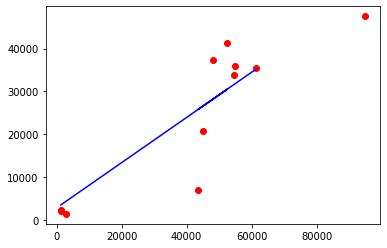

In [29]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [30]:
joblib.dump(lm,"Pet_Coke.pkl")

['Pet_Coke.pkl']